In [4]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_boston, make_blobs, make_moons, make_circles, load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 使用楷体
mpl.rcParams["font.sans-serif"] = ["KaiTi"]
# 避免中文乱码
mpl.rcParams["axes.unicode_minus"] = False

x.shape: (26, 2)


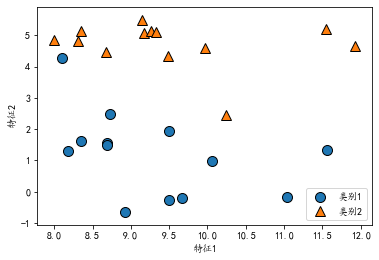

In [5]:
x, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
# loc指的是象限
plt.legend(["类别1", "类别2"], loc=4)
plt.xlabel("特征1")
plt.ylabel("特征2")
# 26个数据点 2个特征
print("x.shape: {}".format(x.shape))

Text(0, 0.5, '回归目标')

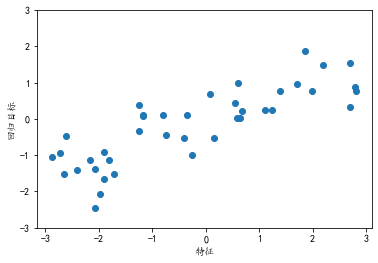

In [6]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("特征")
plt.ylabel("回归目标")

In [7]:
# 威斯康星州乳腺癌数据集
cancer = load_breast_cancer()
# 数据保存为Bunch对象，与字典很相似
print("cancer.keys(): {}".format(cancer.keys()))
# 该数据集有569个数据点，每个数据点有30个特征
print("Shape of cancer data: {}".format(cancer.data.shape))
# 该数据集的569个数据点中，212个被标记为恶性，357个被标记为良性
print("Sample counts per class: {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 为得到该数据集的每个特征的语义说明，可以查feature_names属性
print("Feature names: {}".format(cancer.feature_names))
# 了解更多信息
# print(cancer.DESCR)

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class: {'malignant': 212, 'benign': 357}
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# 波士顿房价数据集
boston = load_boston()
# 该数据集有506个数据点和13个特征
print("Data Shape: {}".format(boston.data.shape))

# 扩展波士顿房价数据集 输入特征不仅包含这13个特征的测量结果，还包括这些特征之间的乘积(交互项)
x, y = mglearn.datasets.load_extended_boston()
# 最初的13个特征加上这13个特征两两组合(有放回)得到91个特征，现一共有104个特征
print("x.shape: {}".format(x.shape))

Data Shape: (506, 13)
x.shape: (506, 104)


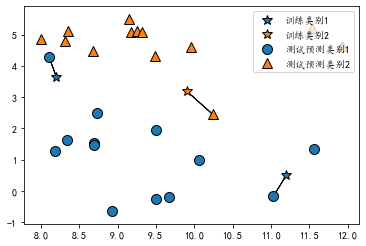

In [30]:
# KNN算法对forge数据集的二分类预测结果可视化
# K=1 只看最邻近的
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.legend(["训练类别1", "训练类别2", "测试预测类别1", "测试预测类别2"], loc=1)

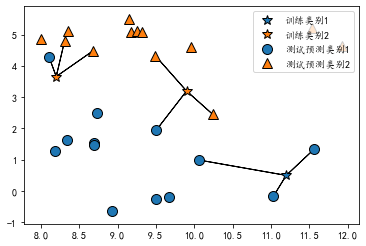

In [29]:
# K=3 三邻近
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.legend(["训练类别1", "训练类别2", "测试预测类别1", "测试预测类别2"], loc=1)

In [11]:
# 这里使用scikit-learn来训练KNN
x, y = mglearn.datasets.make_forge()
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 创建分类器 K=3
clf = KNeighborsClassifier(n_neighbors=3)

# 拟合训练
clf.fit(x_train, y_train)

print("测试集预测结果: {}".format(clf.predict(x_test)))

# 模型对其中86%的样本的预测都是正确的
print("预测准确率：{}".format(clf.score(x_test, y_test)))

测试集预测结果: [1 0 1 0 1 0 0]
预测准确率：0.8571428571428571


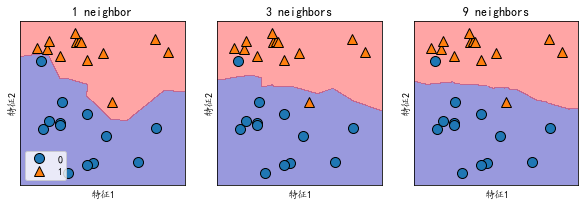

In [12]:
# 对比KNN的K在不同取值下的情况
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 随着K的数值增大，决策边界也越来越平滑 => 使用更少的邻居对应更高的复杂度
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit()返回自身，所以我们可以将实例化和拟合放在同一行code中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title(("{} neighbors" if n_neighbors > 1 else "{} neighbor").format(n_neighbors))
    ax.set_xlabel("特征1")
    ax.set_ylabel("特征2")
    
axes[0].legend(loc=3)

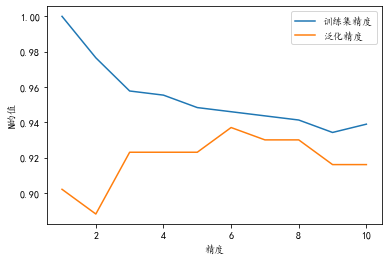

In [13]:
# 使用sickit-learn训练乳腺癌数据集的KNN模型
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy, test_accuracy = [], []

# N取[1, 10]
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(x_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="训练集精度")
plt.plot(neighbors_settings, test_accuracy, label="泛化精度")
plt.xlabel("精度")
plt.ylabel("N的值")
plt.legend()

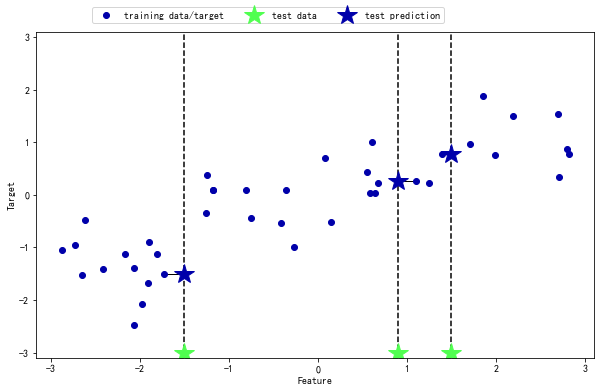

In [14]:
# K邻近回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

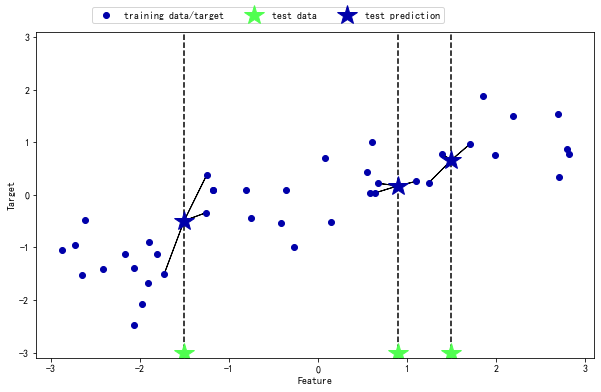

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

测试集预测结果：[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
测试集决定系数R^2：0.8344172446249604


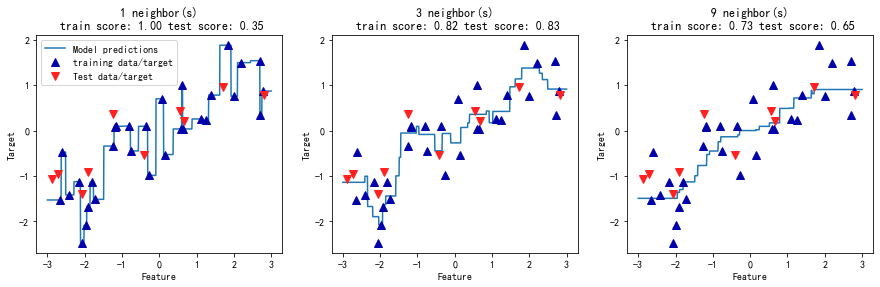

In [16]:
x, y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

print("测试集预测结果：{}".format(reg.predict(x_test)))
print("测试集决定系数R^2：{}".format(reg.score(x_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "training data/target", "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


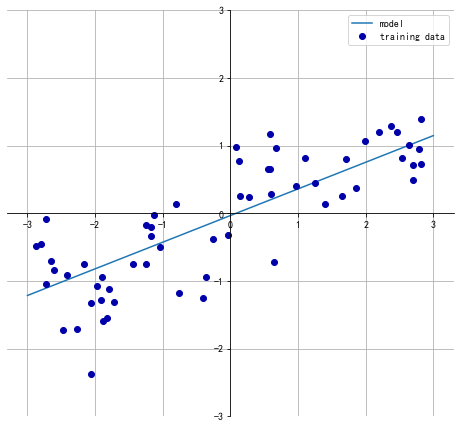

In [17]:
# 线性回归
mglearn.plots.plot_linear_regression_wave()

In [31]:
# scikit-learn训练线性回归
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)

# scikit-learn总是将训练数据中得到的值保存在以下划线结尾的属性中，以区分用户设置的参数
# 斜率
print("斜率：{}".format(lr.coef_))
# 截距
print("截距：{}".format(lr.intercept_))

# 查看训练集和测试集的性能 发现R^2不是很好，且训练集和测试集非常接近（很可能欠拟合）
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

# 调整参数
x, y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

# 训练集和测试集性能差距过大（很可能过拟合）
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

斜率：[0.39390555]
截距：-0.031804343026759746
Training set score: 0.67
Test set score: 0.66
Training set score: 0.95
Test set score: 0.61


In [32]:
# scikit-learn训练岭回归
ridge = Ridge().fit(x_train, y_train)
# 测试集性能低于训练集，且低的不过分，相对合理
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

# alpha系数越大，受到的限制越大
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(x_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test, y_test)))

Training set score: 0.89
Test set score: 0.75
Training set score: 0.79
Test set score: 0.64
Training set score: 0.93
Test set score: 0.77


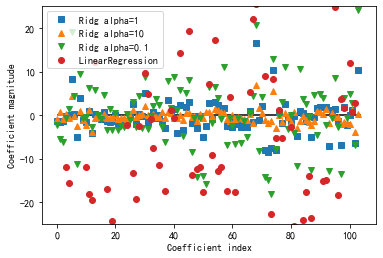

In [33]:
# 将上面做的线性回归和三种岭回归做一下可视化对比
plt.plot(ridge.coef_, 's', label="Ridg alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridg alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridg alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

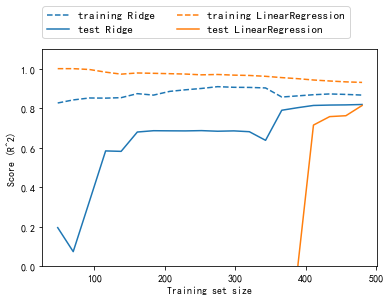

In [34]:
# 对波士顿房价做二次抽样，并在数据量逐渐增加的子数据集上分别对LinearRegression和Ridge(alpha=1)两个模型对比，绘制学习曲线
mglearn.plots.plot_ridge_n_samples()

Training set score: 0.29
Test set score: 0.21
Number of features used: 4
Training set score: 0.90
Test set score: 0.77
Number of features used: 33
Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

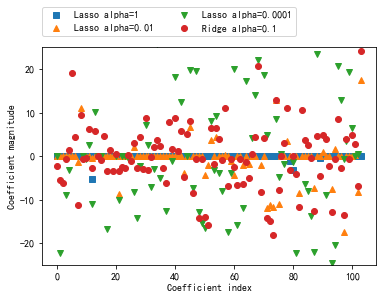

In [35]:
# 在波士顿房价数据集上应用Lasso回归
lasso = Lasso().fit(x_train, y_train)
# 训练集和测试集的效果都不好
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
# 使用到的特征太少，只用了105个特征中的4个
print("Number of features used:", np.sum(lasso.coef_ != 0))

# 应该减小alpha并增大max_iter 模型变得更加复杂
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(x_test, y_test)))
# 用到了33个特征
print("Number of features used:", np.sum(lasso001.coef_ != 0))

# alpha太小就会消除正则化的效果
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

# 绘图对比
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

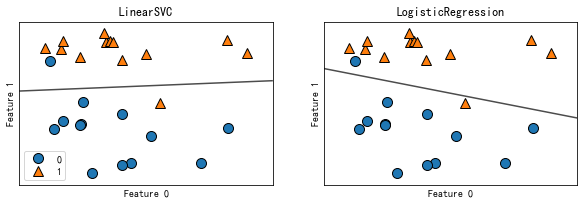

In [39]:
x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 分别绘制线性SVM核Logistic在forge数据集上的决策边界 将线性模型决策边界可视化
for model, ax in zip([LinearSVC(max_iter=100000), LogisticRegression(max_iter=100000)], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

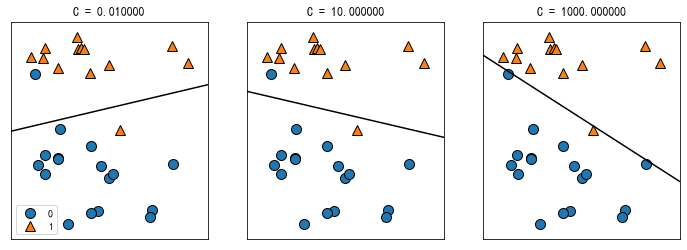

In [40]:
# 调节逻辑回归和线性支持向量机的正则化强度的参数是C，C越大，正则化程度越弱
# 较大的C更强调适应每个点，较小的C更强调适应大多数的数据点
mglearn.plots.plot_linear_svc_regularization()

Training set score: 0.958
Test set score: 0.958
Training set score: 0.984
Test set score: 0.965
Training set score: 0.953
Test set score: 0.951


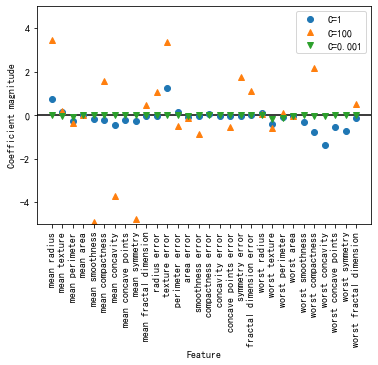

In [44]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 默认C=1 欠拟合
logreg = LogisticRegression(max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

# C=100 性能更好一些
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

# C=0.01 更加欠拟合
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

# 可视化对比C的不同取值
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


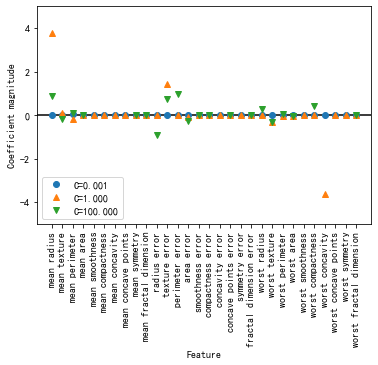

In [45]:
# 影响正则化的参数是penalty 这个参数还影响模型是使用所有特征还是使用所有特征的一个子集
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(x_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

# 绘制使用L1正则化的系数图像和分类精度
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

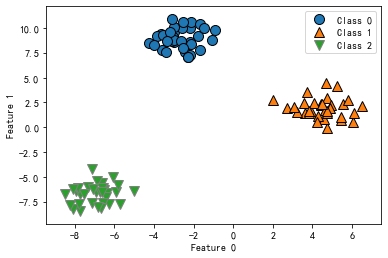

In [46]:
# “一对其余”思想处理三分类问题（每个类别的数据都是从一个高斯分布中采样得到的）
x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


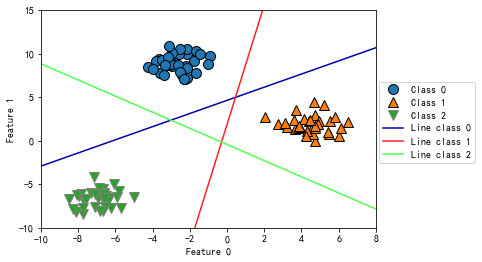

In [49]:
linear_svm = LinearSVC().fit(x, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

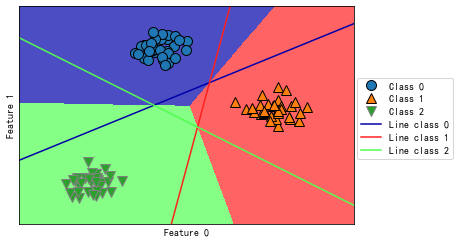

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")